In [1]:
import sys
sys.path.append("/home/adityas/UGA/SensorWeb/scripts/Summer2018/code")

from pathlib import Path
import pandas
import matplotlib.pyplot as plotter

Import data loaders and all

In [2]:
from model.data_loader import DataLoader

In [3]:
files = list(Path("../data/").iterdir())
files = sorted(files, key=lambda x: int(str(x).split("/")[-1].split(".")[0].split("_")[-1]))
files[:10]

[PosixPath('../data/run_0.csv'),
 PosixPath('../data/run_1.csv'),
 PosixPath('../data/run_2.csv'),
 PosixPath('../data/run_3.csv'),
 PosixPath('../data/run_4.csv'),
 PosixPath('../data/run_5.csv'),
 PosixPath('../data/run_6.csv'),
 PosixPath('../data/run_7.csv'),
 PosixPath('../data/run_8.csv'),
 PosixPath('../data/run_9.csv')]

Initialize data loader

## Data stats

In [4]:
dataloader = DataLoader(files)

Print some statistics to look at distributions

        cpu      disk   network    energy
0  0.636356  0.109643  0.032550  0.204011
1  0.878655  0.000000  0.002232  0.228408
2  1.000000  0.054926  0.065164  0.288503
3  0.890368  0.000000  0.067236  0.247839
4  0.879670  0.000000  0.056766  0.242525


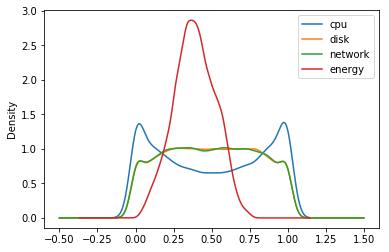

In [5]:
test_data = dataloader[0]
print(test_data.head(5))
test_data.plot(kind="density")
plotter.legend()
plotter.show()

Have a peek at the target function

In [6]:
!head ../scripts/exp.log -n 15

DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
INFO:HighSensitivityLinearEM:Energy meter init with factors cpu:0.24792518649303633 + disk:0.2550646624326527 + net:0.2542521020480565
INFO:Device:Device initialised
DEBUG:Device:Device in state compute
DEBUG:Device:Device in state net_send
DEBUG:Device:Device in state read
DEBUG:Device:Device in state compute


Take a look at the waveforms

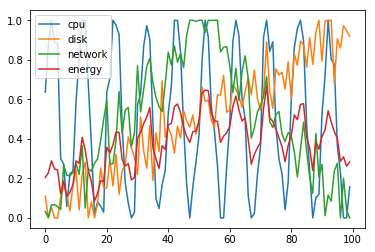

In [7]:
test_data[:100].plot()
plotter.legend()
plotter.show()

Clean up

In [8]:
del test_data

## Learn function

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

In [10]:
regressor = SGDRegressor()

In [11]:
for i in range(1):
    for batch in range(len(dataloader)):
        data = dataloader[i]
        y = data["energy"]
        X = data.drop("energy", axis=1)
        
        regressor.partial_fit(X, y)
        
        print(f"For epoch {i} batch {batch} score is {mean_absolute_error(y_pred=regressor.predict(X), y_true=y)}")

print(f"Regression coefficients are {regressor.coef_}")
print(f"Bias {regressor.intercept_}")

/home/adityas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


For epoch 0 batch 0 score is 0.011706756424505253
For epoch 0 batch 1 score is 0.004036246240470229
For epoch 0 batch 2 score is 0.001630998498331366
For epoch 0 batch 3 score is 0.0007466812178269464
For epoch 0 batch 4 score is 0.0003934139450328946
For epoch 0 batch 5 score is 0.0002425137359076024
For epoch 0 batch 6 score is 0.00017460217223047963
For epoch 0 batch 7 score is 0.00014436374155607905
For epoch 0 batch 8 score is 0.00012973435222343415
For epoch 0 batch 9 score is 0.0001228614807314824
For epoch 0 batch 10 score is 0.00011871496829396246
For epoch 0 batch 11 score is 0.00011707582591495746
For epoch 0 batch 12 score is 0.00011590054241426349
For epoch 0 batch 13 score is 0.00011511058735728244
For epoch 0 batch 14 score is 0.00011506678525412787
For epoch 0 batch 15 score is 0.00011491255939413358
For epoch 0 batch 16 score is 0.00011489524590261674
For epoch 0 batch 17 score is 0.00011527034963641858
For epoch 0 batch 18 score is 0.00011436451106769328
For epoch 0 b